# Week8 Mini-Assignment notebook
## This notebook is used for the initial data exploration including data cleaning and data wrangling
SID:480320449

Firstly, import necessary libraries for the data analysis. Here, I imported **pandas, NumPy, matplotlib** as they will be enough for this week's exploration. Then import the dataset using the pandas function and named it as rawData.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rawData = pd.read_csv('person1-step-data.csv')
rawData

,Source,Date,Hour,Count
0,Person1 iPhone SE,2014-12-07,8,13
1,Person1 iPhone SE,2014-12-07,8,13
2,Person1 iPhone SE,2014-12-07,8,1
3,Person1 iPhone SE,2014-12-07,8,9
4,Person1 iPhone SE,2014-12-07,8,15
...,...,...,...,...
183782,Person1 iPhone SE,2021-09-22,17,1241
183783,Person1 iPhone SE,2021-09-22,17,1212
183784,Person1 iPhone SE,2021-09-22,18,808
183785,Person1 iPhone SE,2021-09-22,18,392


As we can see at the above output, there are 183787 rows and 4 columns in this dataset. While the raw data need to be rearranged as there are multiple rows for one day and the step count for one day is scattered among those rows and need to be group by dates.

In [ ]:
print(rawData['Hour'].max())
print(rawData['Hour'].min())

23
0


The **Hour** column represents the hour interval within a 24-hour time. It has a minimum and maximum value of 0 and 23 respectively.

Now, I start to group the dataset by __*Date*__ and __*Hour*__ to show how many steps did person 1 walked in each time interval within a day. As we can see, the following dataset now categorizes the data by dates and hours in ascending order.

In [ ]:
Data_Hour = rawData.groupby(['Date','Hour']).sum()
Data_Hour.index
Data_Hour.sort_values(by=['Date','Hour'], ascending=True)

Count
Date       Hour       
2014-12-07 8       941
           9       408
           10      157
           11     1017
           14      137
...                ...
2021-09-22 12      305
           13      237
           14        9
           17     3560
           18     1234

[19889 rows x 1 columns]

In [ ]:
Data_Hour.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19889 entries, ('2014-12-07', 8) to ('2021-09-22', 18)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   19889 non-null  int64
dtypes: int64(1)
memory usage: 231.9+ KB


While the above dataset is only recording the step count in each hour within a day. I would like to see how many total steps count person 1 has in a day. So, I just simply categorize the dataset again but only by __*Date*__ and use the aggregate function to aggregate them.

In [ ]:
rawData['Hour'] = rawData['Hour'].astype(object)

In [ ]:
Data_Day= rawData.groupby('Date').agg('sum')
Data_Day

,Count
Date,
2014-12-07,2693
2014-12-08,6567
2014-12-09,6879
2014-12-10,7845
2014-12-11,916
...,...
2021-09-18,11572
2021-09-19,10789
2021-09-20,8800


Using **groupby** function to group the whole dataset by attribute __*Date*__. Now the step counts for the same day are merged into one row and they represent the total step count within a day. Then I plot the data into a graph to visualize the whole dataset. After plotting the barplot, we can see that there is an outlier that has a one-day step count far more than the rest of the dataset.

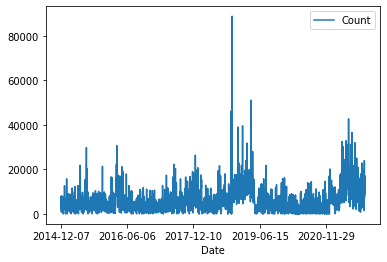

In [ ]:
Data_Day.plot()

In [ ]:
Data_Day['Count'].max()

88821

In [ ]:
Data_Day.loc[Data_Day['Count'] == 88821]

,Count
Date,
2018-11-08,88821


After running the above code, I found that **2018-11-08** has a step count of 88821. I decide to drop this row as this is not making sense for a human to walk 80000+ steps within a day.

In [ ]:
Data_Day = Data_Day.drop('2018-11-08')
Data_Hour = Data_Hour.drop('2018-11-08')

In [ ]:
print(Data_Day['Count'].max())
print(Data_Hour['Count'].max())

58726
58726


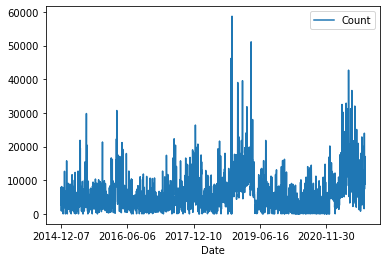

In [ ]:
Data_Day.plot(kind='line')

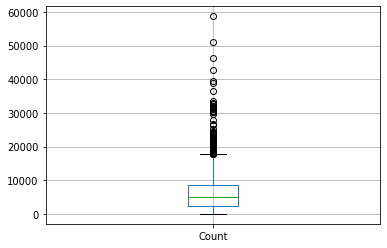

In [ ]:
Data_Day.boxplot()

While the data still has some issues as we can see from the above graph, there are multiple days with step counts over 20000. Which can also be considered as abnormal as for normal people, the daily step wouldn't be that much. This problem needs to be discussed in the next group meeting and find a proper solution.

Then I also try to merge these two datasets into one for future analysis to be easy. However, I've encountered a issue that the __*Hour*__ column cannot be displayed properly. This issue also need to be addressed in the future.

In [ ]:
Data_merged = pd.merge(Data_Hour, Data_Day, how="left", on=["Date"])
Data_merged.rename(columns={'Count_x':'Count in each hour', 'Count_y':'Total count within a day'})
#Data_merge['count_y']=Data_merge['Count in each hour']
#Data.join(Data1.set_index("Date"), how = "left", on="Date")

,Count in each hour,Total count within a day
Date,,
2014-12-07,941,2693
2014-12-07,408,2693
2014-12-07,157,2693
2014-12-07,1017,2693
2014-12-07,137,2693
...,...,...
2021-09-22,305,10220
2021-09-22,237,10220
2021-09-22,9,10220


In [ ]:
Data_Day

,Count
Date,
2014-12-07,2693
2014-12-08,6567
2014-12-09,6879
2014-12-10,7845
2014-12-11,916
...,...
2021-09-18,11572
2021-09-19,10789
2021-09-20,8800
